<a href="https://colab.research.google.com/github/naorex/Python3rdGrade_Deep_Learning_Beginner/blob/main/Chapter05_CNN%E3%81%A7%E5%AD%A6%E7%BF%92.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# カラー画像の(CIFAR-10)の学習

- カラー画像はモノクロ画像と比べてデータ量が3倍になる

In [1]:
!pip install japanize_matplotlib
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import layers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 25.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=72cfe904f4aa2aca2ca0c10b4367ed2102ac31330e6bea99d9e42303be405571
  Stored in directory: /root/.cache/pip/wheels/da/a1/71/b8faeb93276fed10edffcca20746f1ef6f8d9e071eee8425fc
Successfully built japanize_matplotlib


In [ ]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, X_test = x_train / 255.0, x_test / 255.0
print("学習データ", x_train.shape)
print("検証データ", x_test.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
学習データ (50000, 32, 32, 3)
検証データ (10000, 32, 32, 3)


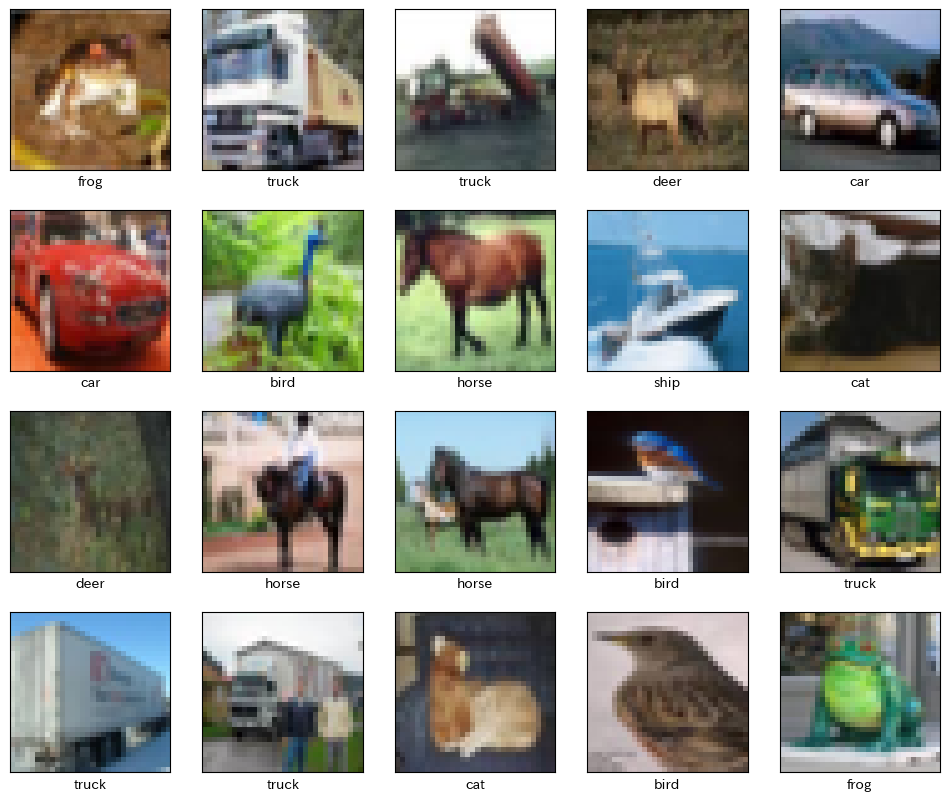

In [ ]:
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
def disp_data(xdata, ydata):
    fig = plt.figure(figsize=(12, 10))
    for i in range(20):
        plt.subplot(4, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(xdata[i])
        plt.xlabel(class_names[ydata[i][0]])
    plt.show()
disp_data(x_train, y_train)

In [ ]:
model=keras.models.Sequential()
model.add(layers.Flatten(input_shape=(32, 32, 3)))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 学習を実行
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    epochs=20,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率: {test_acc:.2%}")

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.2686 - loss: 2.0305 - val_accuracy: 0.3306 - val_loss: 165.1913
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3633 - loss: 1.7657 - val_accuracy: 0.3717 - val_loss: 172.6986
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3856 - loss: 1.7286 - val_accuracy: 0.3697 - val_loss: 173.8049
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3930 - loss: 1.6972 - val_accuracy: 0.3712 - val_loss: 183.1429
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3980 - loss: 1.6859 - val_accuracy: 0.3620 - val_loss: 217.3985
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4014 - loss: 1.6687 - val_accuracy: 0.3581 - val_loss: 221.1057
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4067 - loss: 1.6587 - val_accuracy: 0.3716 - val_loss: 185.0621
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4080 - l

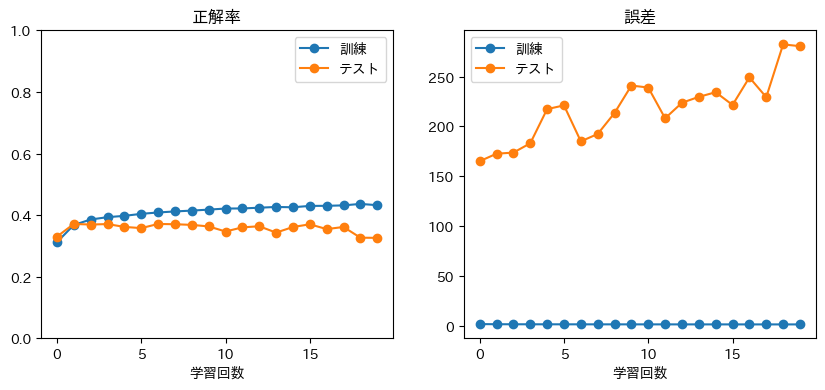

In [ ]:
# 学習の様子を可視化
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim(0,1)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


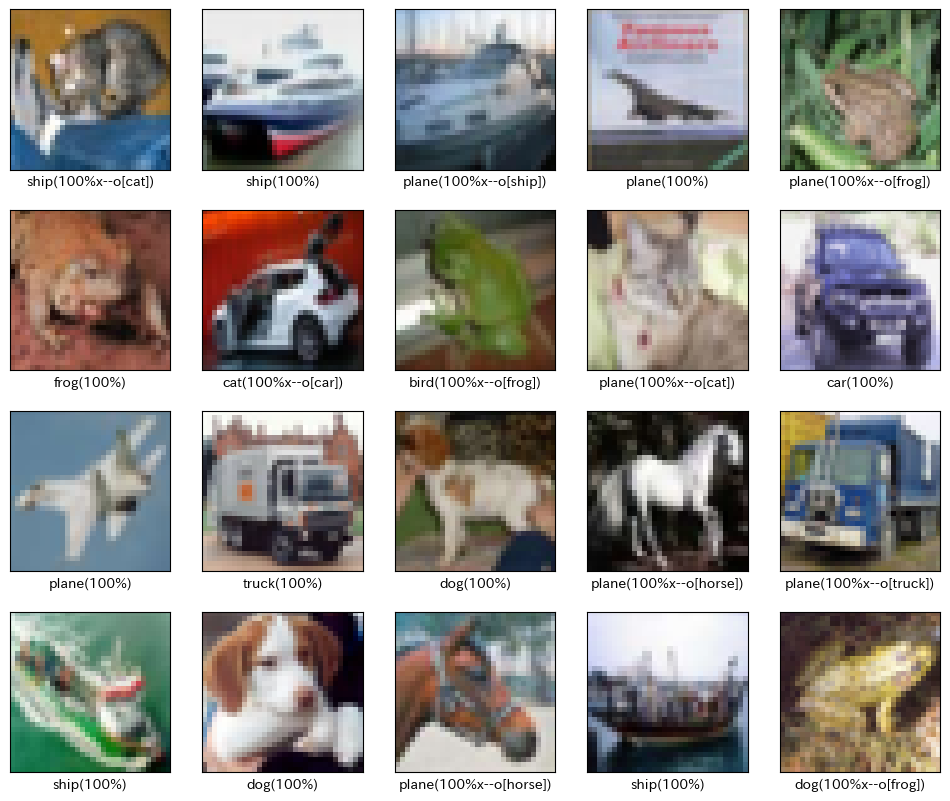

In [ ]:
# データを渡して予測
pre = model.predict(x_test)
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap="gray")

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans=""
    if index != y_test[i]:
        ans = "x--o["+class_names[y_test[i][0]]+"]"
    lbl = f"{class_names[index]}({pct:.0%}{ans})"
    plt.xlabel(lbl)
plt.show()

- 学習が上手く行かないのは、1次元配列でデータを渡すため、画像としての特徴を捉えられていないから

# CNN の実験

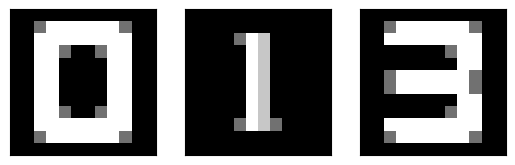

In [2]:
# 数字画像データを用意する
import numpy as np
import matplotlib.pyplot as plt

n0 = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,4,9,9,9,9,9,9,4,0,0],
    [0,0,9,9,9,9,9,9,9,9,0,0],
    [0,0,9,9,4,0,0,4,9,9,0,0],
    [0,0,9,9,0,0,0,0,9,9,0,0],
    [0,0,9,9,0,0,0,0,9,9,0,0],
    [0,0,9,9,0,0,0,0,9,9,0,0],
    [0,0,9,9,0,0,0,0,9,9,0,0],
    [0,0,9,9,4,0,0,4,9,9,0,0],
    [0,0,9,9,9,9,9,9,9,9,0,0],
    [0,0,4,9,9,9,9,9,9,4,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0]
])

n1 = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,4,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,0,9,7,0,0,0,0,0],
    [0,0,0,0,4,9,7,4,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0]
])

n2 = np.array([
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [0,0,4,9,9,9,9,9,9,4,0,0],
    [0,0,9,9,9,9,9,9,9,9,0,0],
    [0,0,0,0,0,0,0,4,9,9,0,0],
    [0,0,0,0,0,0,0,0,9,9,0,0],
    [0,0,4,9,9,9,9,9,9,4,0,0],
    [0,0,4,9,9,9,9,9,9,4,0,0],
    [0,0,0,0,0,0,0,0,9,9,0,0],
    [0,0,0,0,0,0,0,4,9,9,0,0],
    [0,0,9,9,9,9,9,9,9,9,0,0],
    [0,0,4,9,9,9,9,9,9,4,0,0],
    [0,0,0,0,0,0,0,0,0,0,0,0]
])

ndata = [n0,n1,n2]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(ndata[i], cmap="gray")
    plt.xticks([])
    plt.yticks([])
plt.show()

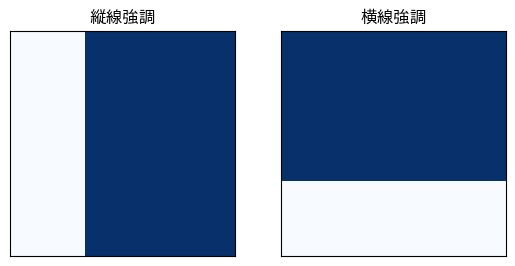

In [3]:
# 畳み込み層のフィルタ演算を行う
## 縦線強調と横線強調のフィルタを行う
fV = np.array([
    [-2,1,1],
    [-2,1,1],
    [-2,1,1]
])

fH = np.array([
    [1,1,1],
    [1,1,1],
    [-2,-2,-2]
])

for i in range(2):
    plt.subplot(1,2,i+1)
    if i == 0:
        plt.imshow(fV, cmap="Blues")
        plt.title("縦線強調")
    else:
        plt.imshow(fH, cmap="Blues")
        plt.title("横線強調")
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
# フィルタ演算関数とダウンサンプリング関数

vdata = []
hdata = []
vpool = []
hpool = []

def convo_img(numing,filter):
    nx,ny = len(numing),len(numing[0])
    img = np.zeros((nx,ny))
    for i in range(nx-3+1):
        for j in range(ny-3+1):
            img[i][j] = np.sum(numing[i:i+3,j:j+3]*filter)
    return img

def pool_img(numing,num):
    img = []
    numing = np.array(numing)
    nx,ny = len(numing),len(numing[0])
    for i in range(0,nx,num):
        row = []
        for j in range(0,ny,num):
            row.append(np.max(numing[i:i+num,j:j+num]))
        img.append(row)
    return img

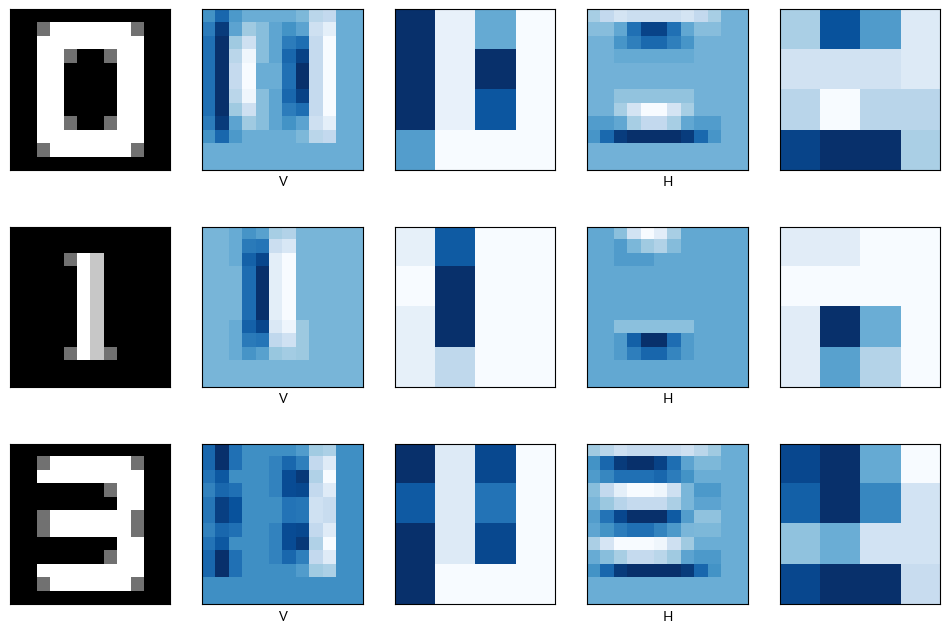

In [5]:
# 画像処理を実施
def cnn_test(data,num,size):
    vdata=[]
    hdata=[]
    vpool=[]
    hpool=[]
    for idx in range(num):
        vdata.append(convo_img(data[idx],fV))
        hdata.append(convo_img(data[idx],fH))
        vpool.append(pool_img(vdata[idx],size))
        hpool.append(pool_img(hdata[idx],size))

    plt.figure(figsize=(12,8))
    for idx in range(num):
        for i in range(5):
            plt.subplot(num,5,idx*5+i+1)
            if i==0:
                plt.imshow(data[idx], cmap="gray")
            if i==1:
                plt.imshow(vdata[idx], cmap="Blues")
                plt.xlabel("V")
            if i==2:
                plt.imshow(vpool[idx], cmap="Blues")
            if i==3:
                plt.imshow(hdata[idx], cmap="Blues")
                plt.xlabel("H")
            if i==4:
                plt.imshow(hpool[idx], cmap="Blues")
            plt.xticks([])
            plt.yticks([])
    plt.show()

cnn_test(ndata,3,3)

- 左から、畳み込み層に通した後の画像2つ、その後はプーリング層に通した後の画像2つ

## MNISTの数字データでテスト

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


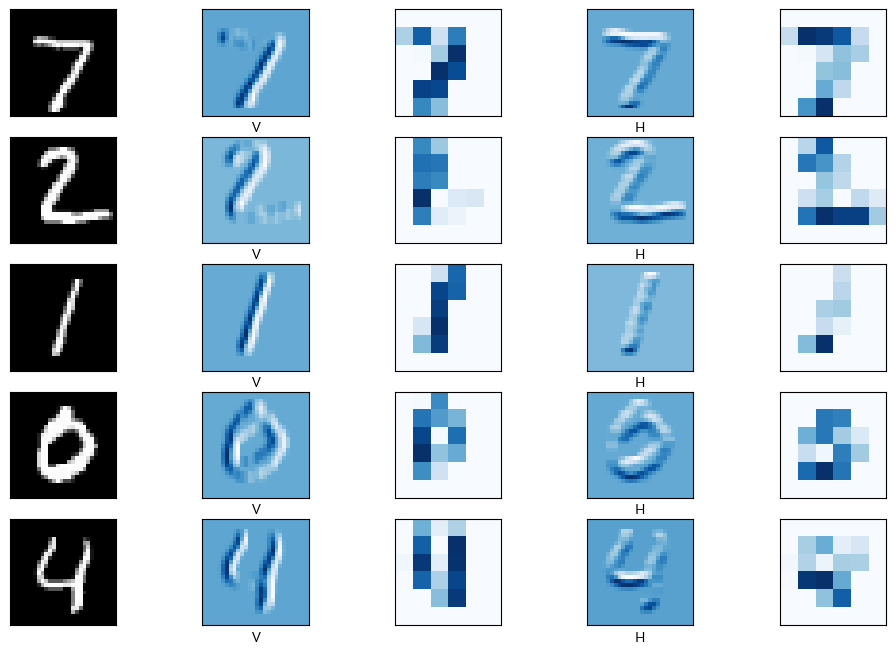

In [6]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, X_test = x_train / 255.0, x_test / 255.0
cnn_test(x_test, 5,5)

## MNISTの服飾データでテスト

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


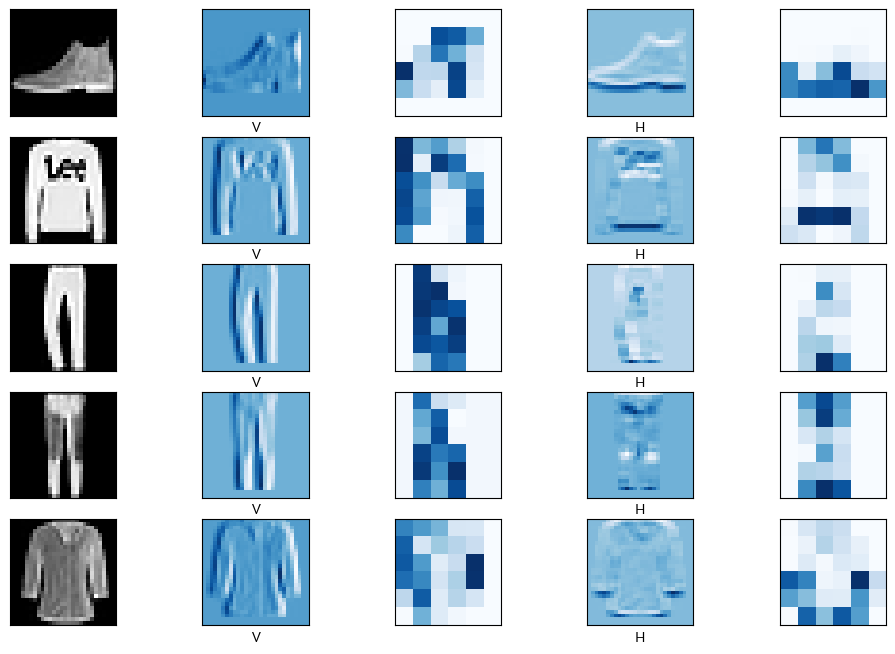

In [7]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, X_test = x_train / 255.0, x_test / 255.0
cnn_test(x_test, 5,5)

# CNN でカラー学習

In [8]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, X_test = x_train / 255.0, x_test / 255.0

print(f"学習データ: {x_train.shape}")
print(f"検証データ: {x_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
学習データ: (50000, 32, 32, 3)
検証データ: (10000, 32, 32, 3)


In [9]:
class_names = ["plane", "car", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

- 畳み込み層とプーリング層に加え、過学習を防ぐためのドロップアウト層を設けて適度のデータを落としていく（まるで人間の物忘れのように）

In [11]:
# モデルを作成
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (5,5), activation="relu", input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2,2))) # 2x2の範囲に区切って小さくする
model.add(layers.Dropout(0.2)) # 20%ドロップアウトで過学習を防止
model.add(layers.Conv2D(64, (5,5), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten()) # 1次元配列にして全結合
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary(line_length=120)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━
┃ Layer (type)                                        ┃ Output Shape                           ┃               Para
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━
│ conv2d_1 (Conv2D)                                   │ (None, 28, 28, 32)                     │                 2,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ max_pooling2d_2 (MaxPooling2D)                      │ (None, 14, 14, 32)                     │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_3 (Dropout)                                 │ (None, 14, 14, 32)                     │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ conv2d_2 (Conv2D)                                   │ (None, 10, 10, 64)                     │                51,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ max_pooling2d_3 (MaxPooling2D)                      │ (None, 5, 5, 64)                       │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_4 (Dropout)                                 │ (None, 5, 5, 64)                       │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ flatten_1 (Flatten)                                 │ (None, 1600)                           │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_3 (Dense)                                     │ (None, 64)                             │               102,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dropout_5 (Dropout)                                 │ (None, 64)                             │                   
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_4 (Dense)                                     │ (None, 32)                             │                 2,
├─────────────────────────────────────────────────────┼────────────────────────────────────────┼───────────────────
│ dense_5 (Dense)                                     │ (None, 10)                             │                   
└─────────────────────────────────────────────────────┴────────────────────────────────────────┴───────────────────

 Total params: 158,570 (619.41 KB)

 Trainable params: 158,570 (619.41 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# 学習を実行
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(x_train, y_train,
                    epochs=20,
                    validation_data=(x_test, y_test))
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"テストデータの正解率: {test_acc:.2%}")

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.2735 - loss: 1.9441 - val_accuracy: 0.4167 - val_loss: 158.8121
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4875 - loss: 1.4279 - val_accuracy: 0.4158 - val_loss: 181.3734
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5331 - loss: 1.3054 - val_accuracy: 0.4334 - val_loss: 174.4120
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5692 - loss: 1.2041 - val_accuracy: 0.4225 - val_loss: 198.9044
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5979 - loss: 1.1396 - val_accuracy: 0.4683 - val_loss: 150.4922
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6229 - loss: 1.0750 - val_accuracy: 0.5064 - val_loss: 123.1900
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6381 - loss: 1.0383 - val_accuracy: 0.4768 - val_loss: 170.2142
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6507 

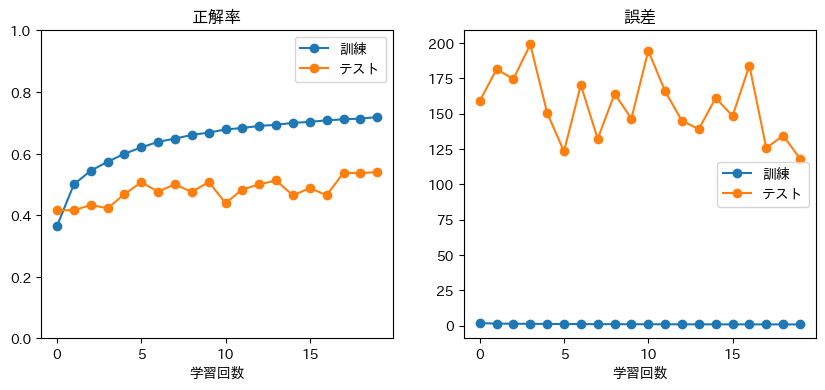

In [13]:
# 学習の様子を可視化
param = [["正解率","accuracy","val_accuracy"],
         ["誤差","loss","val_loss"]]
plt.figure(figsize=(10,4))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(param[i][0])
    plt.plot(history.history[param[i][1]],"o-")
    plt.plot(history.history[param[i][2]],"o-")
    plt.xlabel("学習回数")
    plt.legend(["訓練","テスト"],loc="best")
    if i==0:
        plt.ylim(0,1)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


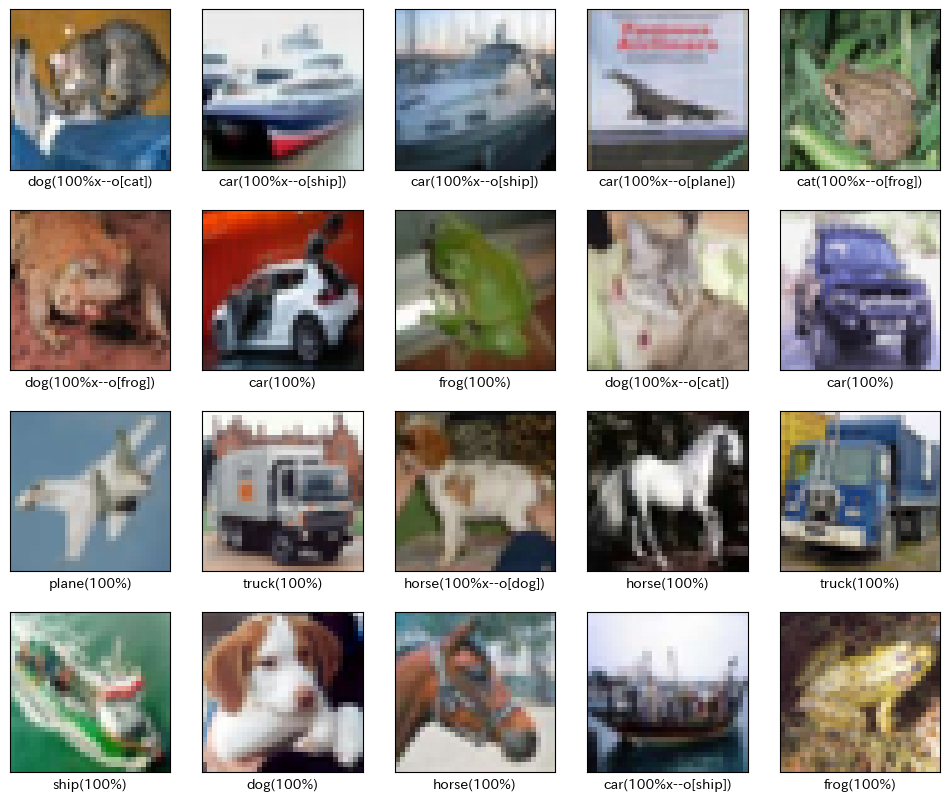

In [14]:
# データを渡して予測
pre = model.predict(x_test)
plt.figure(figsize=(12,10))
for i in range(20):
    plt.subplot(4,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[i], cmap="gray")

    index = np.argmax(pre[i])
    pct = pre[i][index]
    ans=""
    if index != y_test[i]:
        ans = "x--o["+class_names[y_test[i][0]]+"]"
    lbl = f"{class_names[index]}({pct:.0%}{ans})"
    plt.xlabel(lbl)
plt.show()

## 中間層の処理を可視化

In [17]:
hidden_layers = []
for i, val in enumerate(model.layers):
    print(f"{i} : {val.name}")
    hidden_layers.append(val.output)

hidden_model = keras.models.Model(inputs=model.inputs, outputs=hidden_layers)
outputs = hidden_model.predict(x_test)

0 : conv2d_1
1 : max_pooling2d_2
2 : dropout_3
3 : conv2d_2
4 : max_pooling2d_3
5 : dropout_4
6 : flatten_1
7 : dense_3
8 : dropout_5
9 : dense_4
10 : dense_5
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


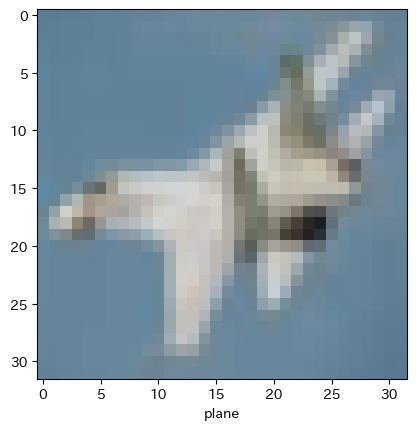

In [21]:
# 10番目の画像を確認
i = 10
plt.imshow(x_test[i])
plt.xlabel(class_names[y_test[i][0]])
plt.show()

In [23]:
# 0番の畳み込み層を確認
def disp_hidden_data(data,w):
    plt.figure(figsize=(12,8))
    num=data.shape[2]
    for i in range(num):
        plt.subplot(int(num/w),w,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(data[:,:,i], cmap="Blues")


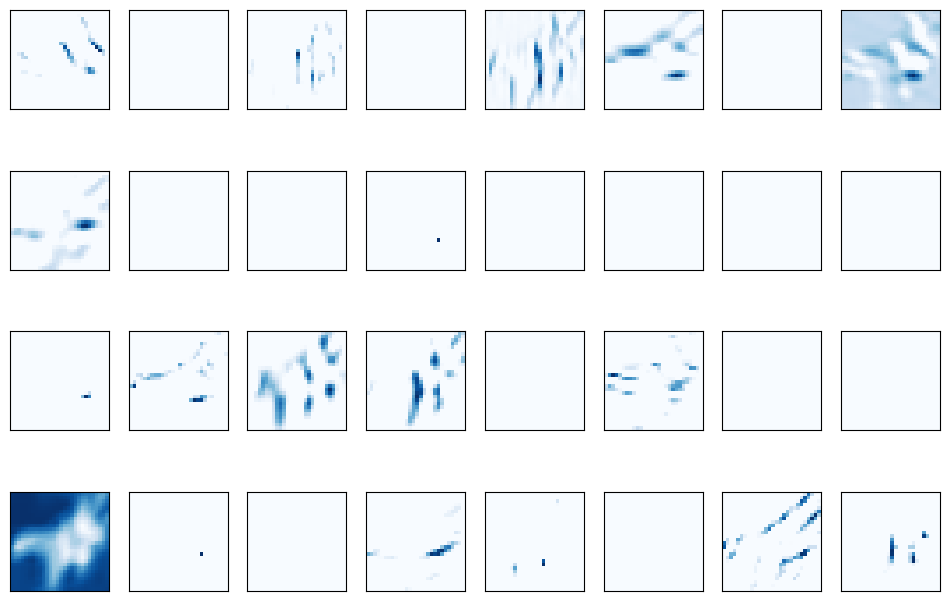

In [24]:
# 0: conv2d
disp_hidden_data(outputs[0][i],8)

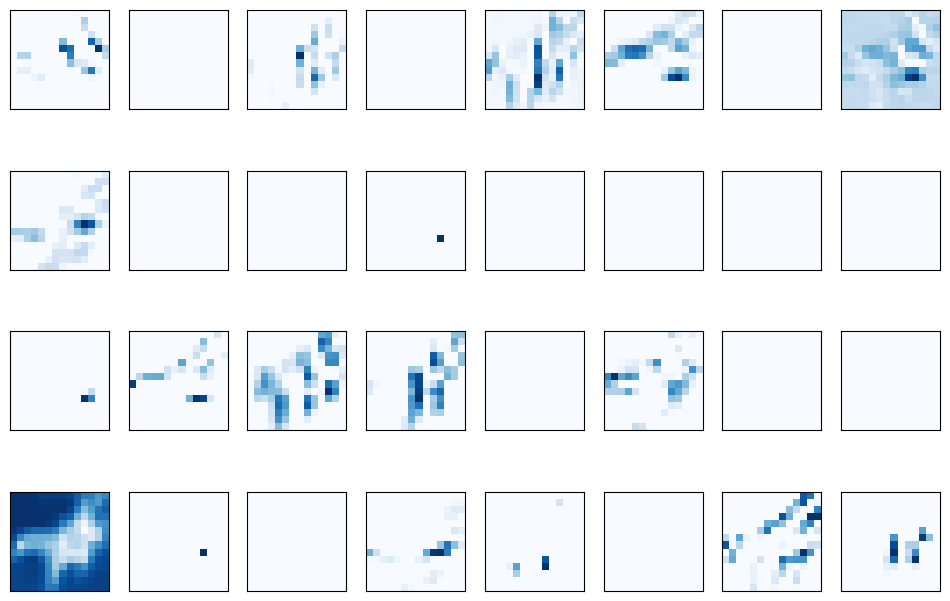

In [25]:
# 1: max_pooling2d
disp_hidden_data(outputs[1][i],8)

- 模様が無い白いのは学習が上手くいってない層